In [4]:
import torch

sentence  = torch.tensor([
     0, # can
    7, # you
    1, # help
    2, # me 
    5, # to
    6, # translate
    4, # this
    3  # sentence]
    ])

In [5]:
sentence

tensor([0, 7, 1, 2, 5, 6, 4, 3])

In [7]:
torch.manual_seed(123)
embed = torch.nn.Embedding(10, 16)
embedded_sentence = embed(sentence).detach()


In [8]:
embedded_sentence.shape

torch.Size([8, 16])

(8 x 16) . (8 x 16)

In [10]:
embedded_sentence.T.shape

torch.Size([16, 8])

In [13]:
omega_mat = embedded_sentence.matmul(embedded_sentence.T)

In [15]:
omega_mat

tensor([[ 9.7601,  1.7326,  4.7543, -1.3587,  0.4752, -1.6717,  1.0227, -0.1286],
        [ 1.7326, 16.0787,  9.0642, -0.3370,  1.1368,  1.1972,  1.6485, -1.2789],
        [ 4.7543,  9.0642, 22.6615, -0.8519,  7.7799,  2.7483, -0.6832,  1.6236],
        [-1.3587, -0.3370, -0.8519, 13.9473, -1.4198, 10.9659, -0.5887,  2.3869],
        [ 0.4752,  1.1368,  7.7799, -1.4198, 13.7511, -6.8568, -2.5114, -3.3468],
        [-1.6717,  1.1972,  2.7483, 10.9659, -6.8568, 24.6738, -3.8294,  4.9581],
        [ 1.0227,  1.6485, -0.6832, -0.5887, -2.5114, -3.8294, 15.8691,  2.0269],
        [-0.1286, -1.2789,  1.6236,  2.3869, -3.3468,  4.9581,  2.0269, 18.7382]])

In [17]:
import torch.nn.functional as F 
attention_weights = F.softmax(omega_mat, dim=1)

In [ ]:
# dim 1 -> columns
attention_weights.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

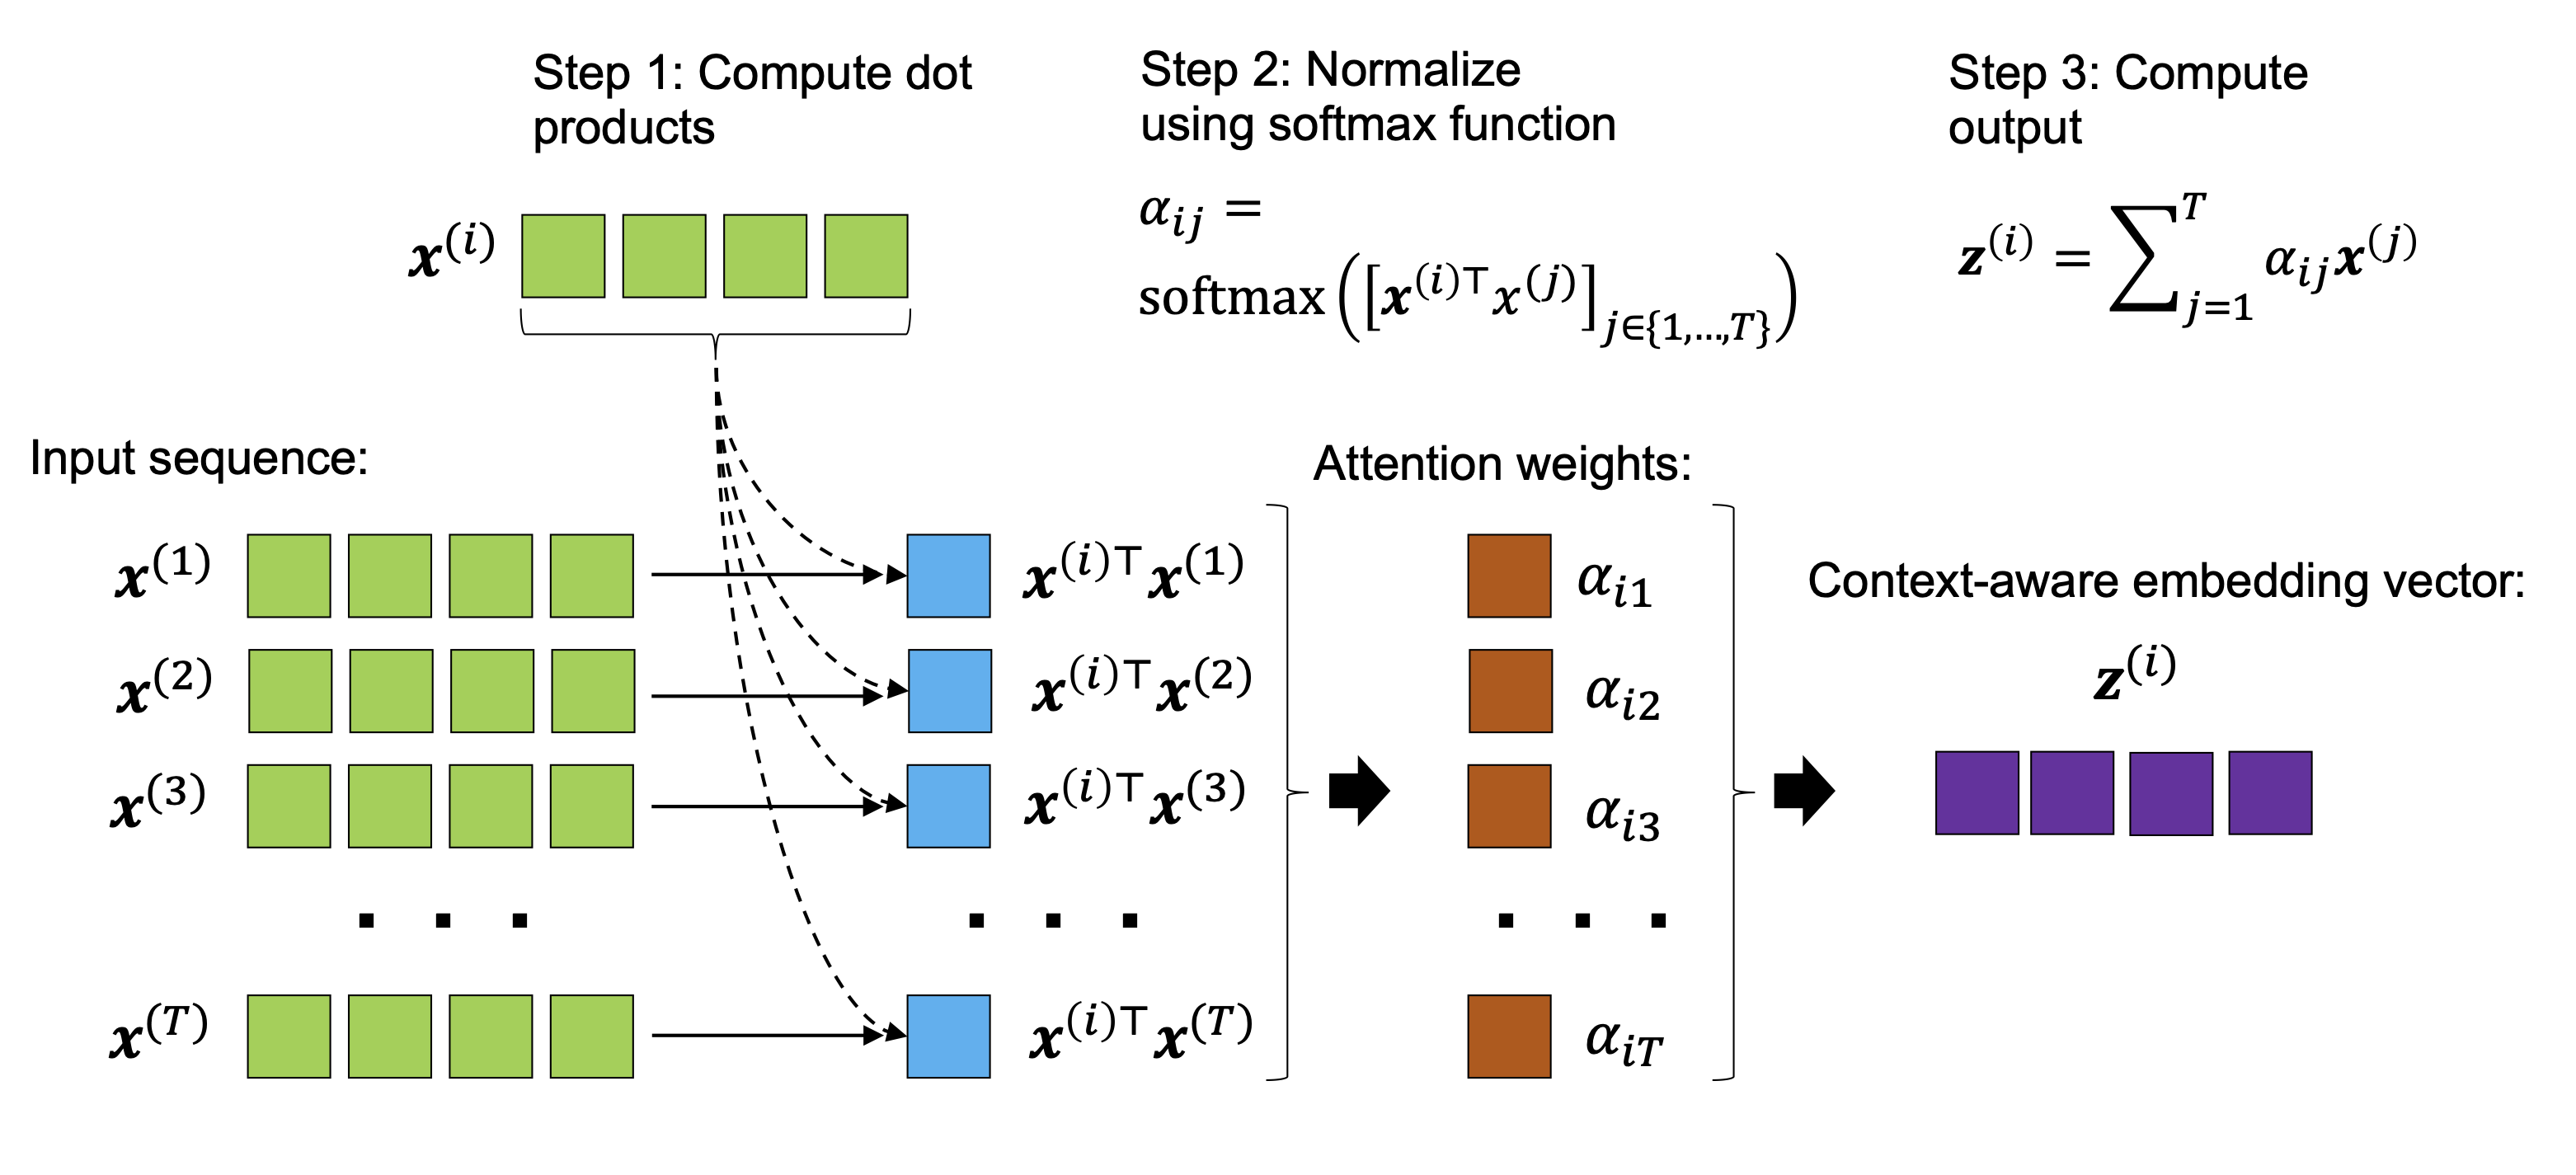

In [23]:
context_vectors  = torch.matmul(attention_weights, embedded_sentence   )

In [24]:
context_vectors.shape

torch.Size([8, 16])